In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('car_data_all_together.csv')

In [3]:
newdata = data.sort_values(by="aspiration", ascending=False)
newdata1 = newdata.iloc[:100]
newdata1["aspiration"].value_counts()

std      63
turbo    37
Name: aspiration, dtype: int64

# One categorical - One sample proportion test - Z-test

In [4]:
from statsmodels.stats.proportion import proportions_ztest
# Is there difference in the number of gas and diesel in our dataset?
# H0 there is not a difference in distribution
# Ha there is a difference in distribution

# H0: p = p0 (population proportion is equal to hypothesized proportion p0)

# The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:
# H1 (two-tailed) alternative="two-sided": p ≠ p0 (population proportion is not equal to some hypothesized value p0)
# H1 (left-tailed) alternative="smaller": p < p0 (population proportion is less than some hypothesized value p0)
# H1 (right-tailed) alternative="larger": p > p0 (population proportion is greater than some hypothesized value p0)

obs = newdata1["aspiration"].value_counts()
obs 
#There were 63 std and 37 turbo charged cars in our dataset.

std      63
turbo    37
Name: aspiration, dtype: int64

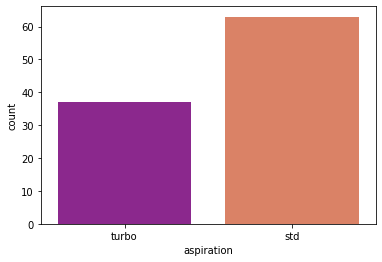

In [11]:
sns.countplot(x="aspiration", data=newdata1, palette="plasma")
plt.show()

In [6]:
# Let's use the first category as 'success' and store them under a separate name:
x = obs[0]
print("The count of std (first category) is: ",x)

The count of std (first category) is:  63


In [7]:
# The value_counts returns a python series, so we can get the sum of values by using Python's sum function:
n = sum(obs.values)
print("The total count is: ",n)

The total count is:  100


In [8]:
# Lets set the expected proportions to be 0.5.
p0 = 0.5
print("The expected proportion is: ", p0)

The expected proportion is:  0.5


In [9]:
# The function requires the number of successes, the sample size, the expected proportion and also set prop_var to this expected proportion. I want a two-sided test, so all together.
zvalue, pvalue = proportions_ztest(count=x, nobs=n, value=p0, prop_var=p0, alternative="two-sided")
# The first value is the z-value, the second is the p-value (significance)
# and we can conclude that there is a significant difference between the proportions of the two categories.
# The 0.0093222 (p-value) is the probability of obtaining a z-value of 2.6 or more extreme if the assumption about the fueltype (the expected proportion of 0.5) was true.
print("The z-value of one sample proportion test is: ", zvalue)
print("The p-value of one sample proportion test is: ", round(pvalue, 5))

The z-value of one sample proportion test is:  2.6
The p-value of one sample proportion test is:  0.00932
